# 生物信息学原理 上机作业

作者：赵超  班级：生物信息1601  学号：2016317200510

1、双序列联配算法，包括全局比对与局部比对，打分矩阵使用PAM250

In [1]:
import numpy as np

In [4]:
# 此为标准PAM250矩阵，为程序设计鲁棒性考虑，在此处作业中不使用

# amino_acid = "CSTPAGNDEQHRKMILVFYW"
# PAM250 = [[12,0,-2,-3,-2,-3,-4,-5,-5,-5,-3,-4,-5,-5,-2,-6,-2,-4,0,-8],
#          [0,2,1,1,1,1,1,0,0,-1,-1,0,0,-2,-1,-3,-1,-3,-3,-2],
#          [-2,1,3,0,1,0,0,0,0,-1,-1,-1,0,-1,0,-2,0,-3,-3,-5],
#          [-3,1,0,6,1,-1,-1,-1,-1,0,0,0,-1,-2,-2,-3,-1,-5,-5,-6],
#          [-2,1,1,1,2,1,0,0,0,0,-1,-2,-1,-1,-1,-2,0,-4,-3,-6],
#          [-3,1,0,-1,1,5,0,1,0,-1,-2,-3,-2,-3,-3,-4,-1,-5,-5,-7],
#          [-4,1,0,-1,0,0,2,2,1,1,2,0,1,-2,-2,-3,-2,-4,-2,-4],
#          [-5,0,0,-1,0,1,2,4,3,2,1,-1,0,-3,-2,-4,-2,-6,-4,-7],
#          [-5,0,0,-1,0,0,1,3,4,2,1,-1,0,-2,-2,-3,-2,-5,-4,-7],
#          [-5,-1,-1,0,0,-1,1,2,2,4,3,1,1,-1,-2,-2,-2,-5,-4,-5],
#          [-3,-1,-1,0,-1,-2,2,1,1,3,6,2,0,-2,-2,-2,-2,-2,0,-3],
#          [-4,0,-1,0,-2,-3,0,-1,-1,1,2,6,3,0,-2,-3,-2,-4,-4,2],
#          [-5,0,0,-1,-1,-2,1,0,0,1,0,3,5,0,-2,-3,-2,-5,-4,-3],
#          [-5,-2,-1,-2,-1,-3,-2,-3,-2,-1,-2,0,0,6,2,4,2,0,-2,-4],
#          [-2,-1,0,-2,-1,-3,-2,-2,-2,-2,-2,-2,-2,2,5,2,4,1,-1,-5],
#          [-6,-3,-2,-3,-2,-4,-3,-4,-3,-2,-2,-3,-3,4,2,6,2,2,-1,-2],
#          [-2,-1,0,-1,0,-1,-2,-2,-2,-2,-2,-2,-2,2,4,2,4,-1,-2,-6],
#          [-4,-3,-3,-5,-4,-5,-4,-6,-5,-5,-2,-4,-5,0,1,2,-1,9,7,0],
#          [0,-3,-3,-5,-3,-5,-2,-4,-4,-4,0,-4,-4,-2,-1,-1,-2,7,10,0],
#          [-8,-2,-5,-6,-6,-7,-4,-7,-7,-5,-3,2,-3,-4,-5,-2,-6,0,0,17]]

In [5]:
amino_acid = 'AEGHPW'
PAM250 = [[5,-1,0,-2,-1,-3],
        [-1,6,-3,0,-1,-2],
        [0,-3,8,-2,-2,-3],
        [-2,0,-2,10,-2,-3],
        [-1,-1,-2,-2,10,-4],
        [-3,-3,-3,-3,-4,15]]

In [9]:
def NeedlemanWunsch(str_one, str_two, punish=8):
    '''
    此函数用于实现全局比对NeedlemanWunsch算法，函数无返回值，仅将最终比对结果输出
    参数：
    str_one：表示第一条序列，类型为字符串
    str_two：表示第二条序列，类型为字符串
    punish：表示罚分，默认值为8
    '''
    m = len(str_one) + 1        # i表示序列1的长度加上1，即得分矩阵的行数
    n = len(str_two) + 1        # j表示序列2的长度加上1，即得分矩阵的列数
    score = np.zeros((m,n), int)

    for i in range(m):
        for j in range(n):
            if (i == 0 or j == 0):
                score[i][j] = 0 - i * punish - j * punish
            else:
                insert = score[i][j-1] - punish
                delete = score[i-1][j] - punish
                match = score[i-1][j-1] + PAM250[amino_acid.index(str_one[i-1])][amino_acid.index(str_two[j-1])]
                score[i][j] = max(insert, delete, match)
    
    Alignment_A = ''
    Alignment_B = ''
    x = m - 1
    y = n - 1
    while (x > 0 or y > 0):
        if (x > 0 and y > 0 and score[x][y] == score[x-1][y-1] + PAM250[amino_acid.index(str_one[x-1])][amino_acid.index(str_two[y-1])]):
            Alignment_A = str_one[x-1] + Alignment_A
            Alignment_B = str_two[y-1] + Alignment_B
            x = x - 1
            y = y - 1
        elif (x > 0 and score[x][y] == score[x-1][y] - punish):
            Alignment_A = str_one[x-1] + Alignment_A
            Alignment_B = '-' + Alignment_B
            x = x - 1
        else:
            Alignment_A = '-' + Alignment_A
            Alignment_B = str_two[y-1] + Alignment_B
            y = y - 1
    print("全局序列比对结果：")
    print("===================")
    print(Alignment_A)
    print(Alignment_B)

In [10]:
P1 = 'AGWGAHEA'
P2 = 'PAWHEAEAG'
NeedlemanWunsch(P1,P2)

全局序列比对结果：
AGWGAHEA-
PAWHEAEAG


In [11]:
def SmithWaterman(str_one, str_two, punish=8):
    '''
    此函数用于实现全局比对SmithWaterman算法，函数无返回值，仅将最终比对结果输出
    参数：
    str_one：表示第一条序列，类型为字符串
    str_two：表示第二条序列，类型为字符串
    punish：表示罚分，默认值为8
    '''
    m = len(str_one) + 1        # i表示序列1的长度加上1，即得分矩阵的行数
    n = len(str_two) + 1        # j表示序列2的长度加上1，即得分矩阵的列数
    score = np.zeros((m,n), int)
    for i in range(m):
        for j in range(n):
            if (i == 0 or j == 0):
                continue
            else:
                match = score[i-1][j-1] + PAM250[amino_acid.index(str_one[i-1])][amino_acid.index(str_two[j-1])]
                insert = score[i][j-1] - punish
                delete = score[i-1][j] - punish
                score[i][j] = max(insert, delete, match, 0)
    
    
    max_score = np.max(score)
    for i in range(m):
        for j in range(n):
            if (score[i][j] == max_score):
                Alignment_A = ''
                Alignment_B = ''
                x = i 
                y = j
                while (score[x][y] != 0):
                    if (x > 0 and y > 0 and score[x][y] == score[x-1][y-1] + PAM250[amino_acid.index(str_one[x-1])][amino_acid.index(str_two[y-1])]):
                        Alignment_A = str_one[x-1] + Alignment_A
                        Alignment_B = str_two[y-1] + Alignment_B
                        x = x - 1
                        y = y - 1
                    elif (x > 0 and score[x][y] == score[x-1][y] - punish):
                        Alignment_A = str_one[x-1] + Alignment_A
                        Alignment_B = '-' + Alignment_B
                        x = x - 1
                    else:
                        Alignment_A = '-' + Alignment_A
                        Alignment_B = str_two[y-1] + Alignment_B
                        y = y - 1
                print("局部序列比对结果：")
                print("===================")
                print(Alignment_A)
                print(Alignment_B)

In [12]:
P1 = 'AGWGAHEA'
P2 = 'PAWHEAEAG'
SmithWaterman(P1,P2)

局部序列比对结果：
HEA
HEA
局部序列比对结果：
WGAHEA
WHEAEA


2、用贪婪法和非循环子图拓扑排序方法实现几条序列的组装

In [1]:
import numpy as np

In [2]:
# w,z,u,x,y表示待组装序列，类型为字符串，Alignment为列表，序列元素为待组装序列

w = 'AGTATTGGCAATC'
z = 'AATCGATG'
u = 'ATGCAAACCT'
x = 'CCTTTTGG'
y = 'TTGGCAATCACT'

Alignment = [w, z, u, x, y]

In [3]:
def overlap(string):  
    '''
    此函数的作用为得到覆盖多图，返回一个列表，列表的元素为元组，每一个元组代表一条边，第一个元素为起始点在
    参数中的index，第二个元素为终点在参数中的index，第三个元素为权重
    参数：
    string：为列表，列表中的元素为待组装序列
    '''
    degree = []
    for i in range(len(string)):
        i_len = len(string[i])
        for j in range(len(string)):
            if (i == j):
                continue
            else:
                t = -1
                while(t + i_len >= 0):
                    if(string[j][0] == string[i][t]):
                        t_abs = -t
                        for k in range(t_abs):
                            if(string[j][k] != string[i][t+k]):
                                t = t - 1
                                break
                            if(k == t_abs - 1):
                                degree.append((i,j,t_abs))
                                t = t - 1
                                break
                    else:
                        t = t - 1
                        continue
    return degree

In [4]:
overlap(Alignment)

[(0, 1, 4), (0, 3, 1), (0, 4, 9), (1, 2, 3), (2, 3, 3), (2, 4, 1), (3, 4, 4)]

In [5]:
def TopologicalSorting(string, t=3):
    '''
    此函数实现拓扑排序，返回值为组装好的序列，类型为字符串
    参数：
    string：为列表，列表中的元素为待组装序列
    t：从覆盖多图得到覆盖图的阈值
    '''
    degree = overlap(string)                        # 得到覆盖多图
    for i in degree[::-1]:                          # 以t为阈值，得到覆盖图
        if(i[2] < t):
            degree.remove(i)
    
    # 计算出所有节点的入度
    in_degree_np = np.zeros(len(string), int)
    in_degree = in_degree_np.tolist()               # 转换成列表是因为np数组没有index方法
    before_node = -1
    new_node = -1
    for edge in degree:
        in_degree[edge[1]] += 1
        
        
    before_node = in_degree.index(0)
    in_degree[before_node] = -1
    Target_Alignment = string[before_node]
    for edge in degree:
        if(edge[0] == before_node):
            in_degree[edge[1]] -= 1
            
            
    while(not all(in_degree)):
        new_node = in_degree.index(0)
        sentry = -1
        in_degree[new_node] = -1
        for edge in degree:
            if(edge[0] == new_node):
                in_degree[edge[1]] -= 1
        for edge in degree:
            if(edge[0] == before_node and edge[1] == new_node):
                Target_Alignment += string[new_node][edge[2]:]
                sentry = 0
        if(sentry == -1):
            Target_Alignment += string[new_node]
        before_node = new_node
                
    return Target_Alignment

In [6]:
TopologicalSorting(Alignment)

'AGTATTGGCAATCGATGCAAACCTTTTGGCAATCACT'

In [7]:
def GreedyAlgorithm(string):
    '''
    此函数实现贪婪算法组装序列，返回值为组装好的序列，类型为字符串
    参数：
    string：为列表，列表中的元素为待组装序列
    '''
    degree = overlap(string)
    in_degree_np = np.zeros(len(string), int)      # 初始化所有节点的入度为0
    in_degree = in_degree_np.tolist()
    
    out_degree_np = np.zeros(len(string), int)     # 初始化所有节点的出度为0
    out_degree = out_degree_np.tolist()
    
    for i in range(len(string)):
        for j in range(len(string)):
            sentry = 0
            for edge in degree:
                if(edge[0] == i and edge[1] == j):
                    sentry = 1
                    break
            if (sentry == 0):
                degree.append((i, j, 0))
                
    degree_sorted = sorted(degree, key = lambda x:(x[2], x[0], x[1]), reverse=True)  
    # 对所有的边按照权重排序
    
    Hamilton = []                              # 存储最后的哈密顿路径
    
    
    # 此函数用于判别图中是否有回路
    def is_pulse(in_degree, out_degree, degree):
        is_visited = np.zeros(len(in_degree), int)    # 存储是否被访问过，0表示未被访问，1表示已被访问
        start_node = -1
        while(not all(is_visited)):
            for i in range(len(in_degree)):
                if(i > start_node):

                    start_node = i
                    is_visited[start_node] = 1
                    break
                

            now_node = start_node
            while(out_degree[now_node] != 0):
                for edge in degree:
                    if(edge[0] == now_node):
                        if(is_visited[edge[1]] == 1):
                            return True              # 有回路，返回True
                        else:
                            is_visited[edge[1]] = 1
                            now_node = edge[1]
                            break
                if(now_node == start_node):     # 如果当前节点仍然等于开始节点，则跳出循环
                    break
                    
                    

        if(all(is_visited)):
            return False        
    
    # 贪婪算法，依次选取最大的边，且每个点的入度出度都不大于1，路径中无回路
    for edge in degree_sorted:
        if(in_degree[edge[1]] == 0 and out_degree[edge[0]] == 0):
            Hamilton.append(edge)
            in_degree[edge[1]] = 1
            out_degree[edge[0]] = 1
            if(is_pulse(in_degree, out_degree, Hamilton)):
                Hamilton.remove(edge)
                in_degree[edge[1]] = 0
                out_degree[edge[0]] = 0
    
    # 将哈密顿路径组装为序列
    start_alignment = in_degree.index(0)
    now_alignment = start_alignment
    TargetAlignment = string[start_alignment]
    for i in range(len(string) - 1):
        for edge in Hamilton:
            if(edge[0] == now_alignment):
                TargetAlignment += string[edge[1]][edge[2]:]
                now_alignment = edge[1]
    return TargetAlignment

In [8]:
GreedyAlgorithm(Alignment)

'AGTATTGGCAATCACTAATCGATGCAAACCTTTTGG'

3、从给定的fna 中提取ptt文件中标注的位置和正反链信息，编程实现寻找注释基因的核酸序列（输出到文件，并统计起始密码子个数），然后将每条核酸序列翻译成氨基酸序列并输出到文件。

In [20]:
import re

In [21]:
StartCodon = {}             # 存储起始密码子及其个数
genetic_code = {
    'T': {
        'T': {'T': 'F', 'C': 'F', 'A': 'L', 'G': 'L'},
        'C': {'T': 'S', 'C': 'S', 'A': 'S', 'G': 'S'},
        'A': {'T': 'Y', 'C': 'Y', 'A': '', 'G': ''},
        'G': {'T': 'C', 'C': 'C', 'A': '', 'G': 'W'}
    },
    'C': {
        'T': {'T': 'L', 'C': 'L', 'A': 'L', 'G': 'L'},
        'C': {'T': 'P', 'C': 'P', 'A': 'P', 'G': 'P'},
        'A': {'T': 'H', 'C': 'H', 'A': 'Q', 'G': 'Q'},
        'G': {'T': 'R', 'C': 'R', 'A': 'R', 'G': 'R'}
    },
    'A': {
        'T': {'T': 'I', 'C': 'I', 'A': 'I', 'G': 'M'},
        'C': {'T': 'T', 'C': 'T', 'A': 'T', 'G': 'T'},
        'A': {'T': 'N', 'C': 'N', 'A': 'K', 'G': 'K'},
        'G': {'T': 'S', 'C': 'S', 'A': 'R', 'G': 'R'}
    },
    'G': {
        'T': {'T': 'V', 'C': 'V', 'A': 'V', 'G': 'V'},
        'C': {'T': 'A', 'C': 'A', 'A': 'A', 'G': 'A'},
        'A': {'T': 'D', 'C': 'D', 'A': 'E', 'G': 'E'},
        'G': {'T': 'G', 'C': 'G', 'A': 'G', 'G': 'G'}
    }
                }

In [22]:
with open(r"C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\NC_006270.fna") as fna:
    with open(r"C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\NC_006270.ptt") as ptt:
        # 以下为读取fna文件操作
        is_first_line = True
        chromosome = ''
        DNA = ''
        cDNA = ''
        for line in fna.readlines():
            if(is_first_line):
                chromosome = line.split()[0]
                is_first_line = False
                continue
            DNA += line.strip()
        for i in DNA:
            if i == 'A':
                cDNA += 'T'
            elif i == 'T':
                cDNA += 'A'
            elif i == 'C':
                cDNA += 'G'
            elif i == 'G':
                cDNA += 'C'
        cDNA = cDNA[::-1]
        DNA_length = len(DNA)

        with open(r"C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\NC_006270_alignment.txt", "w") as txt:
            with open(r"C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\NC_006270_protein.txt", "w") as pro:
                line_num = 0
                for line in ptt.readlines():
                    line_num += 1
                    if(line_num > 3):
                        line_split = line.split()
                        matchOBJ = re.match(r'(.*)\.\.(.*)',line_split[0])
                        if(line_split[1] == '+'):
                            txt.write(chromosome + matchOBJ.group(1) + '-' + matchOBJ.group(2)+ ' ' + str(line_split[8:]) + '\n')
                            pro.write(chromosome + matchOBJ.group(1) + '-' + matchOBJ.group(2)+ ' ' + str(line_split[8:]) + '\n')

                            sub_DNA = DNA[int(matchOBJ.group(1))-1:int(matchOBJ.group(2))]
                            startcodon = sub_DNA[0:3]
                            try:
                                StartCodon[startcodon]
                            except:
                                StartCodon[startcodon] = 1
                            else:
                                StartCodon[startcodon] += 1
                            txt.write(sub_DNA + '\n')
                            base_index = 0
                            while(base_index < len(sub_DNA)):
                                aa = genetic_code[sub_DNA[base_index]][sub_DNA[base_index+1]][sub_DNA[base_index+2]]
                                if(aa != ''):
                                    pro.write(aa)
                                else:
                                    break
                                base_index += 3
                            pro.write('\n')    
                        else:
                            txt.write(chromosome + 'c' + matchOBJ.group(2) + '-' + matchOBJ.group(1)+ ' ' + str(line_split[8:]) + '\n')
                            pro.write(chromosome + 'c' + matchOBJ.group(2) + '-' + matchOBJ.group(1)+ ' ' + str(line_split[8:]) + '\n')                            
                            sub_DNA = cDNA[DNA_length-int(matchOBJ.group(2)):DNA_length-int(matchOBJ.group(1))+1]
                            startcondon = sub_DNA[0:3]
                            try:
                                StartCodon[startcodon]
                            except:
                                StartCodon[startcodon] = 1
                            else:
                                StartCodon[startcodon] += 1
                            base_index = 0
                            while(base_index < len(sub_DNA)):
                                aa = genetic_code[sub_DNA[base_index]][sub_DNA[base_index+1]][sub_DNA[base_index+2]]
                                if(aa != ''):
                                    pro.write(aa)
                                else:
                                    break
                                base_index += 3
                            pro.write('\n')
                            
                            txt.write(sub_DNA + '\n')

In [23]:
StartCodon

{'ATG': 3145, 'ATT': 1, 'GTG': 414, 'TTG': 613}

4、编程实现Fisher判别

In [9]:
from scipy.linalg import solve

In [10]:
def Fisher(postive_file, negative_file):
    '''
    此函数实现Fisher判别，返回值为Fisher对象，可用于in_use函数进行判别
    参数：
    postive_file：正样本文件地址
    negative_file：负样本文件地址
    '''
    positive_sample = []
    negative_sample = []
    with open(positive_file, encoding='UTF-8',errors='ignore') as f:
        for line in f.readlines():
            line_split = line.split()
            line_int = []
            for i in line_split:
                line_int.append(float(i))
            positive_sample.append(line_int)
    with open(negative_file, encoding='UTF-8',errors='ignore') as f:
        for line in f.readlines():
            line_split = line.split()
            line_int = []
            for i in line_split:
                line_int.append(float(i))
            negative_sample.append(line_int)
        
    positive_sample_np = np.array(positive_sample)
    negative_sample_np = np.array(negative_sample)
    
    p = positive_sample_np.shape[0]
    q = negative_sample_np.shape[0]
    
    pos_x_sum = np.sum(positive_sample_np, 0)
    neg_x_sum = np.sum(negative_sample_np, 0)
    
    pos_x_average = pos_x_sum / p
    neg_x_average = neg_x_sum / q
    
    pos_x_sum_mat = np.mat(pos_x_sum)
    neg_x_sum_mat = np.mat(neg_x_sum)
    
    d = pos_x_average - neg_x_average
    
    pos_xx_sum = np.dot(positive_sample_np.T, positive_sample_np)
    neg_xx_sum = np.dot(negative_sample_np.T, negative_sample_np)
    
    S = pos_xx_sum - np.dot(pos_x_sum_mat.T, pos_x_sum_mat) / p + neg_xx_sum - np.dot(neg_x_sum_mat.T, neg_x_sum_mat) / q
    
    try:
        C = solve(S, d)
    except:
        print("该数据无法进行Fisher判别")
    else:
        y_pos = np.dot(C, pos_x_average)
        y_neg = np.dot(C, neg_x_average)
        threshold = (p * y_pos + q * y_neg) / (p + q)
        if y_pos > y_neg:
            return(C, threshold, 1)          # 返回一个Fisher对象
        else:
            return(C, threshold, 0)

In [11]:
def in_use(fisher, sample):                  
    '''
    此函数实现对其他数据进行判别，属于正样品返回True，否则返回False
    参数：
    fisher：fihser对象，为Fisher函数的返回值
    sample：样本，类型为列表
    '''
    y = np.dot(fisher[0], sample)
#     print(fisher)
    if(fisher[2] == 1):
        if(y > fisher[1]):
            print("这个样本是属于正样本类")
            return True
        else:
            print("这个样本是属于负样本类")
            return False
    else:
        if(y > fisher[1]):
            print("这个样本是属于负样本类")
            return False
        else:
            print("这个样本是属于正样本类")
            return True

In [12]:
positive_file = r"C:\Users\hzauz\Desktop\BioinformaticsProjectData\Fisher\Fisher-positive.txt"
negative_file = r"C:\Users\hzauz\Desktop\BioinformaticsProjectData\Fisher\Fisher-negative.txt"
fisher = Fisher(positive_file, negative_file)

sample = [-0.2029, 0.1159, 0.2174, 7.0435, -0.1159, -0.6087, 9.2899, 0.2174, -0.2319, -0.0638]
in_use(fisher, sample)
# positive_sample = []
# with open(negative_file, encoding='UTF-8',errors='ignore') as f:
#         for line in f.readlines():
#             line_split = line.split()
#             line_int = []
#             for i in line_split:
#                 line_int.append(float(i))
#             positive_sample.append(line_int)
# for i in range(len(positive_sample)):
#     in_use(fisher, positive_sample[i])

这个样本是属于正样本类


True

5、编程实现K-means聚类

In [31]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def Graph(node_set, node_cluster):
    '''
    此函数的作用是将聚类后的点画出来
    参数：
    node_set：点集，类型为二维列表，存储每一个点的坐标
    node_cluster：类型为列表，元素值为int，代表每个点的分类
    '''
    node_set = np.array(node_set)
    node_cluster = np.array(node_cluster)
    df = pd.DataFrame({
        'Y': node_set[:,1],
        'X': node_set[:,0],
        'Cluster': node_cluster
    })

    fg = sns.FacetGrid(data=df, hue='Cluster')
    fg.map(plt.scatter, 'X', 'Y').add_legend()
    plt.show()

In [35]:
def kmeans(sample_file, k=3, D_min=3, d_max=4):
    '''
    此函数实现kmeans聚类，聚类结果以图表的形式画出，无返回值
    参数：
    sample_file：数据集地址
    k：给定初始k值，用于聚类
    D_min：所有种子点间的距离应大于此值
    d_max：当某一样本点与所有种子点距离均大于此值时作为新的种子点
    '''
    node_set = []                 # 存储所有的样本点
    seed_set = []                 # 存储所有的种子点
    
    
    # 将文件中的数据读取进来
    with open(sample_file) as f:
        for line in f.readlines():
            line_split = line.split()
            node_set.append([float(line_split[0]),float(line_split[1])])
    
    node_cluster = np.full(len(node_set), -1)    # 记录每个样本点所归为的类别
    for i in range(k):                    # 选取初始的K个样本点为聚类种子点
        seed_set.append(node_set[i])
    
    last_time_cluster = np.full(len(node_set), -1)     # 此变量记录上一次聚类的结果


    # 定义计算两点间距离的函数
    def distance(node_one, node_two):     
        return math.sqrt(pow(node_one[0] - node_two[0], 2) + pow(node_one[1] - node_two[1], 2))
    
    
    # 定义调整种子点的函数
    def seed_select(seed, cluster):
        control_seed = 1    # 控制种子点的选取变量，该变量取0的时候说明所有的种子点距离已经大于D_min
        while(control_seed):
            
            for i in range(len(seed)):
                tmp = 0         # 控制变量
                for j in range(len(seed)):
                    if(j <= i and i != len(seed) - 1):
                        continue
                    elif(i == len(seed) - 1):
                        control_seed = 0
                        tmp = 1
                        break
                    else:
                        dis = distance(seed[i], seed[j])
                        if(dis < D_min):
                            centre = [(seed[i][0] + seed[j][0])/2,(seed[i][1] + seed[j][1])/2]

                            del seed[i]

                            del seed[j - 1]       # j必定大于i
                            seed.append(centre)
                            for k in range(len(cluster)):
                                if(cluster[k] == i or cluster[k] == j):
                                    cluster[k] = len(seed) - 1
                                elif(i < cluster[k] < j):
                                    cluster[k] -= 1
                                elif(cluster[k] > j):
                                    cluster[k] -= 2
                            tmp = 1
                            break
                        else:
                            continue
                if(tmp):
                    break
        return seed, cluster
    
    
    # 调整种子点
    seed_set, node_cluster = seed_select(seed_set, node_cluster)
    

    # 以下为第一次聚类
    for i in range(len(node_set)):
        # 计算该样品点与所有种子点的距离
        dis_to_seed = np.zeros(len(seed_set))
        for j in range(len(seed_set)):
            dis_to_seed[j] = distance(node_set[i], seed_set[j])
        d_max_array = np.full_like(dis_to_seed, d_max)
        
        # 若该样品点与所有种子点距离均大于d_max则作为新的种子点
        if((dis_to_seed >= d_max_array).all()):
            seed_set.append(node_set[i])
            node_cluster[i] = len(seed_set) - 1
        else:        # 否则加入到距离最小的该类中，并以该类的几何中心作为新的种子点
            min_index = np.argmin(dis_to_seed)
            node_cluster[i] = min_index
            num_of_cluster = 0
            x = 0
            y = 0
            for k in range(i + 1):
                if(node_cluster[k] == min_index):
                    num_of_cluster += 1
                    x += node_set[i][0]
                    y += node_set[i][1]
            x /= num_of_cluster
            y /= num_of_cluster
            seed_set[min_index] = [x, y]
            
        # 调整聚类种子点后再考虑下一个样本点
        seed_set, node_cluster = seed_select(seed_set, node_cluster)      
    
    
    # 画出第一次聚类结果
    print("首次聚类结果：")
    Graph(node_set, node_cluster)
    
    
    # 进行聚类迭代，当此次聚类与上一次聚类相同时，退出循环
    while(not (last_time_cluster == node_cluster).all()):
        last_time_cluster = node_cluster.copy()         # 上一次聚类的结果
        
        for i in range(len(node_set)):
            # 计算该样品点与所有种子点的距离
            dis_to_seed = np.zeros(len(seed_set))
            for j in range(len(seed_set)):
                dis_to_seed[j] = distance(node_set[i], seed_set[j])
            d_max_array = np.full_like(dis_to_seed, d_max)
        
            # 若该样品点与所有种子点距离均大于d_max则作为新的种子点
            if((dis_to_seed >= d_max_array).all()):
                seed_set.append(node_set[i])
                node_cluster[i] = len(seed_set) - 1
            else:  
                min_index = np.argmin(dis_to_seed)
                node_cluster[i] = min_index
         
        # 调整种子点为当前类的几何中心
        for i in range(len(seed_set)):
            x = 0
            y = 0
            node_num_cluster = 0
            for j in range(len(node_cluster)):
                if(node_cluster[j] == i):
                    x += node_set[j][0]
                    y += node_set[j][1]
                    node_num_cluster += 1
            x /= node_num_cluster
            y /= node_num_cluster
            seed_set[i] = [x, y]
            
        # 调整种子点后进行下一轮迭代
        seed_set, node_cluster = seed_select(seed_set, node_cluster)

        
    # 最终聚类结果
    print("最终聚类结果：")
    Graph(node_set, node_cluster) 

首次聚类结果：


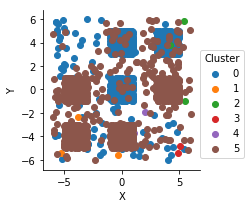

最终聚类结果：


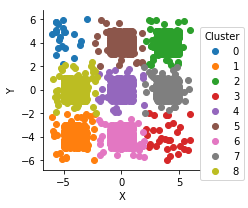

In [36]:
sample_file = r"C:\Users\hzauz\Desktop\BioinformaticsProjectData\K-means data.txt"
kmeans(sample_file,3,3,4)

6、从给定的基因组fna文件中找出所有＞90bp的ORFs，翻译起始位点仅用ATG，翻译终止位点TAA，TAG，TGA

In [37]:
def FindORFs(FNAfile, t):
    '''
    此函数实现从给定的基因组fna文件中找出所有>90bp的ORFs，无返回值，结果输出到相应的文件中
    参数:
    FNAfile：表示给定的fna文件的路径
    t：代表阈值，即>t bp
    '''
    chromosome = ''                         # 存储第一列有关信息
    DNA = ''                                # 存储正链DNA
    cDNA = ''                               # 存储负链DNA
    with open(FNAfile) as fna:
        # 以下为读取fna文件操作
        is_first_line = True
        for line in fna.readlines():
            if(is_first_line):
                chromosome = line
                is_first_line = False
                continue
            DNA += line.strip()
        for i in DNA:
            if i == 'A':
                cDNA += 'T'
            elif i == 'T':
                cDNA += 'A'
            elif i == 'C':
                cDNA += 'G'
            elif i == 'G':
                cDNA += 'C'
        cDNA = cDNA[::-1]
        DNA_length = len(DNA)
    
    DNA_ORFs_File = r"C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\DNA_ORFs_File.txt"
    cDNA_ORFs_File = r"C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\cDNA_ORFs_File.txt"
    
    DNA_ORFs_number = 0
    cDNA_ORFs_number = 0
    
    with open(DNA_ORFs_File,"w") as f:
        f.write(chromosome)
        for i in range(DNA_length):
            if(DNA[i:i+3] == 'ATG'):
                for j in range(i+1, DNA_length):
                    if(DNA[j:j+3] == 'TAA' or DNA[j:j+3] =='TGA' or DNA[j:j+3] == 'TAG'):
                        if(((j+3-i)%3) != 0):
                            continue
                        elif(j+3-i > t):
                            DNA_ORFs_number += 1
                            f.write(DNA[i:j+3] + '\n')
                            break
                        else:
                            break
    
    with open(cDNA_ORFs_File,"w") as f:
        f.write(chromosome)
        for i in range(DNA_length):
            if(cDNA[i:i+3] == 'ATG'):
                surplus_cDNA_length = DNA_length - i - 1 
                for j in range(i+1, DNA_length):
                    if(cDNA[j:j+3] == 'TAA' or cDNA[j:j+3] =='TGA' or cDNA[j:j+3] == 'TAG'):
                        if(((j+3-i)%3) != 0):
                            continue
                        elif(j+3-i > t):
                            cDNA_ORFs_number += 1
                            f.write(cDNA[i:j+3] + '\n')
                            break
                        else:
                            break
                            
    print("已完成寻找>", t, "bp ORFs工作 \n")
    print("共找到：", DNA_ORFs_number + cDNA_ORFs_number, "个ORF序列 \n")
    print("其中正链上有：", DNA_ORFs_number, "个ORF序列 \n")
    print("其中负链上有：", cDNA_ORFs_number, "个ORF序列 \n")
    print("正链上ORF序列存储于：", DNA_ORFs_File, "\n")
    print("负链上ORF序列存储于：", cDNA_ORFs_File, "\n")

In [38]:
FNAfile = r"C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\NC_006270.fna"
FindORFs(FNAfile, 30)
FindORFs(FNAfile, 60)
FindORFs(FNAfile, 90)
FindORFs(FNAfile, 120)

已完成寻找> 30 bp ORFs工作 

共找到： 114282 个ORF序列 

其中正链上有： 57149 个ORF序列 

其中负链上有： 57133 个ORF序列 

正链上ORF序列存储于： C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\DNA_ORFs_File.txt 

负链上ORF序列存储于： C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\cDNA_ORFs_File.txt 

已完成寻找> 60 bp ORFs工作 

共找到： 84602 个ORF序列 

其中正链上有： 42355 个ORF序列 

其中负链上有： 42247 个ORF序列 

正链上ORF序列存储于： C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\DNA_ORFs_File.txt 

负链上ORF序列存储于： C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\cDNA_ORFs_File.txt 

已完成寻找> 90 bp ORFs工作 

共找到： 65609 个ORF序列 

其中正链上有： 32900 个ORF序列 

其中负链上有： 32709 个ORF序列 

正链上ORF序列存储于： C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\DNA_ORFs_File.txt 

负链上ORF序列存储于： C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\cDNA_ORFs_File.txt 

已完成寻找> 120 bp ORFs工作 

共找到： 53187 个ORF序列 

其中正链上有： 26561 个ORF序列 

其中负链上有： 26626 个ORF序列 

正链上ORF序列存储于： C:\Users\hzauz\Desktop\BioinformaticsProjectData\data\DNA_ORFs_File.txt 

负链上ORF序列存储于： C:\Users\hzauz\Deskto

7、编程实现课本第105页的HMM模型

In [2]:
def HMM(Alignment, model):
    '''
    此函数实现隐马尔可夫模型
    其中状态值有三种：Sunny, Cloudy, Rainy 
    特征值有四种：Dry, Dryish, Soggy, Damp
    参数：
    Alignment：表示输入的序列
    model:
        0表示评估问题：对于给定模型，求某个观察值序列的概率
        1表示解码问题：对于给定模型和观察值序列，求可能性最大的状态序列
    '''
    state = ['Sunny', 'Cloudy', 'Rainy']           # 此为天气状态序列
    seaweed = ['Dry', 'Dryish', 'Damp', 'Soggy']   # 此为海草状态序列
    pi = np.mat([0.63, 0.17, 0.20])                # 存储起始概率
    transfer = np.mat([[0.500, 0.250, 0.250],      # 存储状态转移矩阵
                       [0.375, 0.250, 0.375],
                       [0.125, 0.675, 0.200]])
    output = np.mat([[0.60, 0.20, 0.15, 0.05],     # 存储输出矩阵，列分别代表Dry, Dryish, Damp, Soggy
                     [0.25, 0.25, 0.25, 0.25],
                     [0.05, 0.10, 0.35, 0.50]])
    
    # 以下为评估问题
    if(model == 0):  
        probability = 0         # 存储最终给定观察值序列的概率
        alpha = np.multiply(pi.T, output[:, seaweed.index(Alignment[0])])
        for i in range(1, len(Alignment)):
            temp = np.dot(transfer.T, alpha)
            alpha = np.multiply(temp, output[:, seaweed.index(Alignment[i])])
        probability = np.sum(alpha)
        return probability
    
    
    # 以下为解码问题
    if(model == 1):
        pathway = []            # 存储最终可能性最大的状态序列
        delta = np.multiply(pi, output[:, seaweed.index(Alignment[0])].T)
        phi = []
        
        for i in range(1, len(Alignment)):
            delta = np.multiply(delta.T, transfer)
            temp = np.max(delta,axis=0)
            phi.append(np.where(delta==np.max(delta,axis=0))[0][np.argsort(np.where(delta==np.max(delta,axis=0))[1])])
            delta = np.multiply(temp, output[:, seaweed.index(Alignment[i])].T)
        last = np.where(delta==np.max(delta))[1][0]
        pathway.append(state[last])
        for i in range(len(phi))[::-1]:
            pathway.append(state[phi[i][last]])
            last = phi[i][last]
        print("最有可能的状态序列为：",pathway[::-1])
        return pathway[::-1]

In [45]:
Alignment = ['Dry', 'Damp', 'Soggy', 'Dryish']
HMM(Alignment, 1)

最有可能的状态序列为： ['Sunny', 'Cloudy', 'Rainy', 'Cloudy']


['Sunny', 'Cloudy', 'Rainy', 'Cloudy']